In [2]:
from tools import *
import pandas as pd
import matplotlib.pyplot as plt
import qgrid
import seaborn as sns

In [102]:
date = '2016-01'

df = pd.read_csv(outputPath(f"""{date}/authorLevelStats.csv"""), index_col=0)
df.index.name = 'subreddit_id'
df = df.set_index('subreddit',drop=False)

In [105]:
df.columns

Index(['aut_sub_count_min', 'aut_sub_count_max', 'aut_sub_count_mean',
       'aut_sub_count_std', 'aut_sub_count_25%', 'aut_sub_count_median',
       'aut_sub_count_75%', 'aut_com_count_min', 'aut_com_count_max',
       'aut_com_count_mean', 'aut_com_count_std', 'aut_com_count_25%',
       'aut_com_count_median', 'aut_com_count_75%', 'aut_com_entropy_min',
       'aut_com_entropy_max', 'aut_com_entropy_mean', 'aut_com_entropy_std',
       'aut_com_entropy_25%', 'aut_com_entropy_median', 'aut_com_entropy_75%',
       'aut_com_gini_min', 'aut_com_gini_max', 'aut_com_gini_mean',
       'aut_com_gini_std', 'aut_com_gini_25%', 'aut_com_gini_median',
       'aut_com_gini_75%', 'aut_com_blau_min', 'aut_com_blau_max',
       'aut_com_blau_mean', 'aut_com_blau_std', 'aut_com_blau_25%',
       'aut_com_blau_median', 'aut_com_blau_75%', 'aut_insub_min',
       'aut_insub_max', 'aut_insub_mean', 'aut_insub_std', 'aut_insub_25%',
       'aut_insub_median', 'aut_insub_75%', 'subreddit'],
      dtyp

In [ ]:
authors = pd.read_csv(cachePath(f"""{date}/authorStats.gzip"""),compression='gzip', index_col=0)

commaify = lambda value: "{:,}".format(value)

num_pairs = commaify(authors.shape[0])
num_subreddits = commaify(authors['subreddit'].unique().shape[0])
num_authors = commaify(authors['author'].unique().shape[0])

In {{date}} there were {{num_pairs}} author-subreddit pairs, by {{num_authors}} authors in {{num_subreddits}} subreddits.

In [ ]:
count_correlation = df[['author_count','comment_count']].corr().iloc[0,1].round(3)

The number of authors and comments per subreddit have a correlation of {{count_correlation}}

In [ ]:
corrs = authors.corr().round(3)

For pairs, author insubreddit ratio is highly correlated with author id - {{corrs['aut_insub']['author_id']}}. Author id is the rank of the author by number of subreddits comments in, where 1 is the highest

In [35]:
insubs = df[[col for col in df.columns if col.startswith('aut_insub')]]

In [36]:
subset = getSubset(insubs.rank(pct=True)).T
subset['TOTAL MEDIAN']=insubs.median()
subset=subset.drop('aut_insub_max')
subset=subset.drop('aut_insub_min')
subset=subset.sort_values('TOTAL MEDIAN')

All of the subreddits that the same 'aut_insub_max'

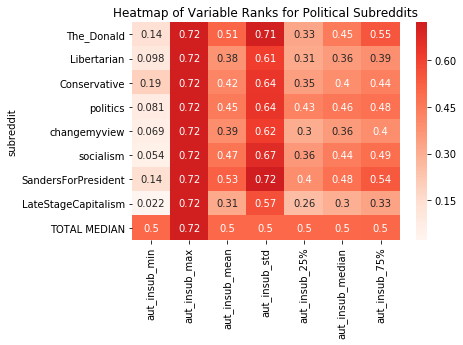

In [96]:
sr = getSubset(insubs.rank(pct=True))
sr.loc['TOTAL MEDIAN'] = insubs.rank(pct=True).median()

sns.heatmap(sr, cmap='Reds', center=0.5, annot=True).set_title('Heatmap of Variable Ranks for Political Subreddits');

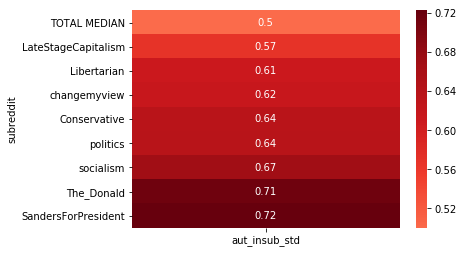

In [93]:
from IPython.display import display

std = sr['aut_insub_std']

sns.heatmap(pd.DataFrame(std.sort_values()), cmap='Reds', annot=True, center=0.5);

All of the sample political subreddits appear to have a higher author insubreddit ratio standard deviation than the median subreddit in particular The_Donald ({{std['The_Donald']}} percentile) and SandersForPresident ({{std['SandersForPresident']}})

In [27]:
def annotatedHist(df, variable):
    x = df[variable].sort_values()

    plt.hist(x, cumulative=True, color='black', histtype='step')
    
    locs, labels = plt.yticks()          

    total = locs[-1]
    new_locs = np.arange(0, total+1, total/5)
    new_labels = [int(x) for x in np.arange(0, 101, 100/5)]

    plt.yticks(new_locs, new_labels)

    X = getSubset(x)
    rank = x.rank()
    Y = getSubset(rank)
    xmin, xmax = plt.xlim()

    plt.vlines(X, 0, Y, color='g')
    plt.hlines(Y, xmin, X,
               color='g', linestyles='dashed')

    plt.title(variable)
    plt.show()

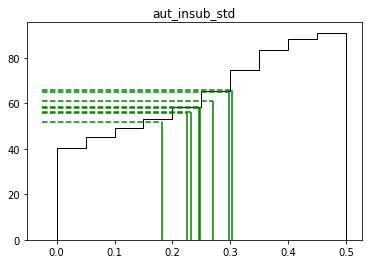

In [28]:
%matplotlib inline 
variable = 'aut_insub_std'
annotatedHist(df, variable)

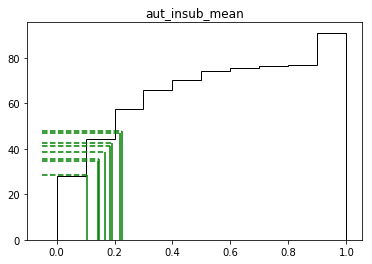

In [30]:
annotatedHist(df, 'aut_insub_mean')

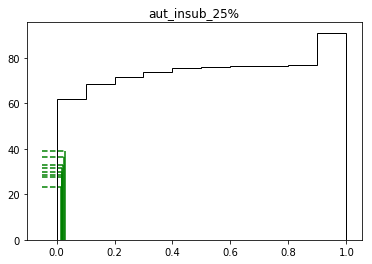

In [31]:
annotatedHist(df, 'aut_insub_25%')

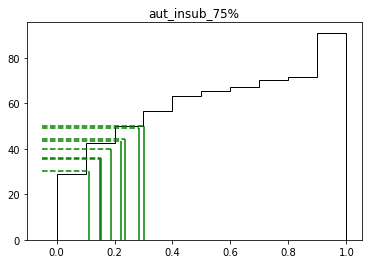

In [32]:
annotatedHist(df, 'aut_insub_75%')

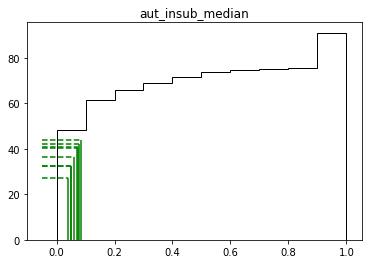

In [33]:
annotatedHist(df, 'aut_insub_median')

In [37]:
subset

subreddit,The_Donald,Libertarian,Conservative,politics,changemyview,socialism,SandersForPresident,LateStageCapitalism,TOTAL MEDIAN
aut_insub_25%,0.325964,0.313004,0.346589,0.429959,0.304586,0.363072,0.399088,0.255954,0.036771
aut_insub_median,0.449321,0.356066,0.399010,0.460351,0.356066,0.442393,0.479744,0.297808,0.090909
aut_insub_std,0.714470,0.611087,0.636317,0.639204,0.617488,0.670270,0.722738,0.568221,0.103935
aut_insub_mean,0.513964,0.379609,0.421659,0.454043,0.391753,0.468259,0.525481,0.314369,0.209141
aut_insub_75%,0.549565,0.390843,0.439844,0.479132,0.396531,0.486844,0.539712,0.332680,0.250000


No handles with labels found to put in legend.


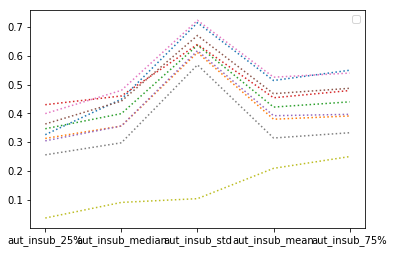

In [50]:
plt.plot(subset.sort_values('TOTAL MEDIAN'), linestyle=':')
plt.legend();

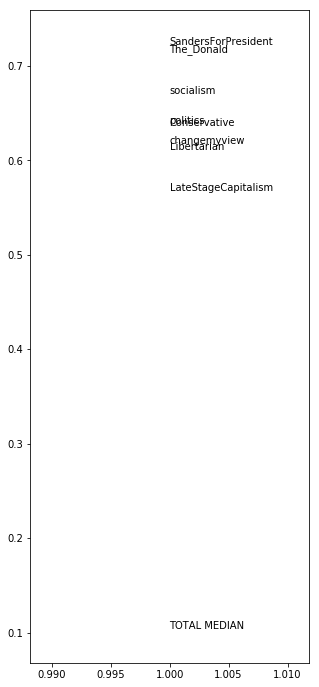

In [69]:
y = subset.loc['aut_insub_std'].sort_values()
x = [1]*len(x)
n = y.index

fig, ax = plt.subplots(figsize=(5,12))
ax.scatter(x = x, y=y, alpha=0)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [97]:
x = sr['aut_insub_max'].max()

0.719247183606866

In [99]:
authors = pd.read_csv(cachePath(f"""{date}/authorStats.gzip"""),compression='gzip', index_col=0)

test = authors[authors['aut_insub']==x]

/anaconda3/envs/part1/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


TypeError: invalid type comparison

In [ ]:
test.shape